<a href="https://colab.research.google.com/github/valid999/Traning_Deep_Neural_Network_GPU_Image_Classification/blob/main/Traning_Deep_neural_network_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Deep neural network with the GPU with PyTorch

#### Import libraries

In [489]:
import torch
import numpy as np
import  torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid



time: 924 µs (started: 2023-09-27 03:38:34 +00:00)


In [490]:
dataset = MNIST(root = 'data/',
                 download = True ,
                 transform = ToTensor()
                 )

time: 67.7 ms (started: 2023-09-27 03:38:35 +00:00)


In [491]:
img , label = dataset[0]
img.shape , label
# (torch.Size([1, 28, 28]), 5)  color ,  width - height , label

(torch.Size([1, 28, 28]), 5)

time: 3.11 ms (started: 2023-09-27 03:38:35 +00:00)


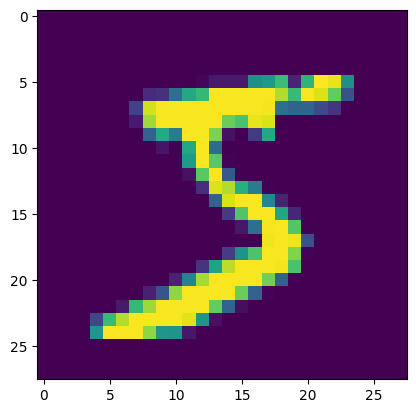

time: 201 ms (started: 2023-09-27 03:38:35 +00:00)


In [492]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0])

In [493]:
def split_indices(n , val_pct):

  # Determine the  size of validation set
  n_val  = int(val_pct*n)
  # Create the random permutation of 0 to 1
  idxs = np.random.permutation(n)
  # Pick the fist n_val indices for validation set
  return idxs[n_val:] , idxs[:n_val]

time: 428 µs (started: 2023-09-27 03:38:35 +00:00)


In [494]:
train_indices , val_indices = split_indices(len(dataset) , val_pct = 0.2)
print(len(train_indices) , len(val_indices))
print('sample val indices :' , val_indices[:20])

48000 12000
sample val indices : [28482 11296 35198 47928 33500 27992 45215 45449 52689 33396  6514 59147
 50856 34525 10704   848  2657 45316 18742 31469]
time: 2.78 ms (started: 2023-09-27 03:38:35 +00:00)


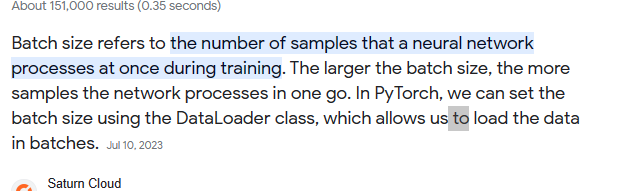

In [495]:
batch_size = 130

# Training all the sampler and the data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset ,
                      batch_size ,
                      sampler = train_sampler
                      )


# Validation sampler and data loader
valid_sampler = SubsetRandomSampler(val_indices)
valid_dl = DataLoader(dataset ,
                      batch_size ,
                      sampler = valid_sampler
                      )

time: 802 µs (started: 2023-09-27 03:38:35 +00:00)


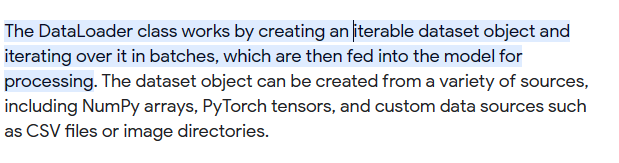

image.shape: torch.Size([130, 1, 28, 28])


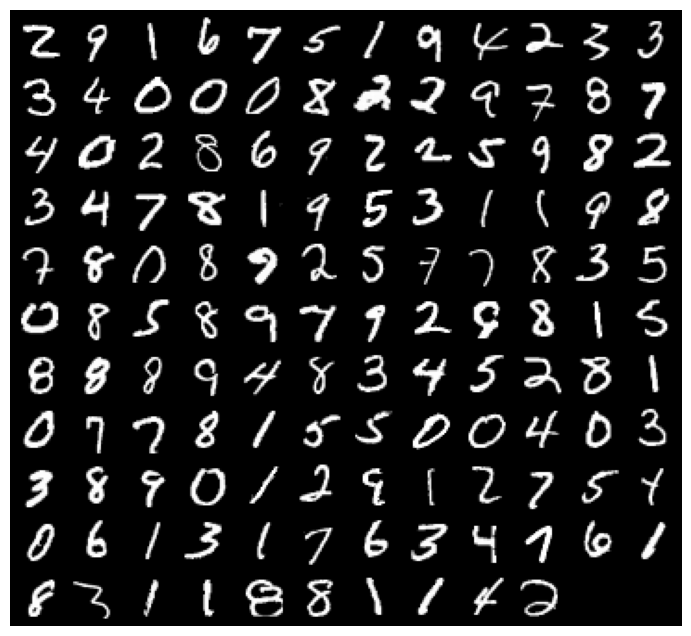

time: 335 ms (started: 2023-09-27 03:38:35 +00:00)


In [496]:
for images , _ in train_dl:

  print('image.shape:' , images.shape)
  plt.figure(figsize = (16 , 8))
  plt.axis('off')
  plt.imshow(make_grid(images , nrow = 12).permute((1 , 2 , 0)))
  break


In [497]:
for images , labels in train_dl:
  print('image.shape:', images.shape)
  # inputs = images.reshape(-1 , 784)
  inputs  = images.view(images.size(0) , -1)
  print('Inputs.shape: ', inputs.shape)
  break


# [100 , 784] Input will go to the neural net work
# [100 , 1 , 28 , 28] the old version

image.shape: torch.Size([130, 1, 28, 28])
Inputs.shape:  torch.Size([130, 784])
time: 264 ms (started: 2023-09-27 03:38:36 +00:00)


In [498]:
# Create the inpute for thyehidden layer

input_size = inputs.shape[-1]
hidden_size = 32

time: 830 µs (started: 2023-09-27 03:38:36 +00:00)


In [499]:
# Hidden layers
layer1 = nn.Linear(input_size , hidden_size) # batch size , 32

time: 1.51 ms (started: 2023-09-27 03:38:36 +00:00)


In [500]:
inputs.shape

torch.Size([130, 784])

time: 5.26 ms (started: 2023-09-27 03:38:36 +00:00)


In [501]:
layer1_outputs = layer1(inputs)
print('layer1_ouput.shape:' , layer1_outputs.shape)

layer1_ouput.shape: torch.Size([130, 32])
time: 1.56 ms (started: 2023-09-27 03:38:36 +00:00)


In [502]:
layer1_outputs_direct = inputs  @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([130, 32])

time: 4.77 ms (started: 2023-09-27 03:38:36 +00:00)


In [503]:
torch.allclose(layer1_outputs , layer1_outputs_direct , 1e-3)

True

time: 3.3 ms (started: 2023-09-27 03:38:36 +00:00)


In [504]:
F.relu(torch.tensor([[1 , -1 , 0] ,
                     [-0.1 , .2 , 3]
                     ]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

time: 4.36 ms (started: 2023-09-27 03:38:36 +00:00)


In [505]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):' , torch.min(layer1_outputs).item())
print('min(relu_outputs):' , torch.min(relu_outputs).item())

min(layer1_outputs): -0.6596759557723999
min(relu_outputs): 0.0
time: 936 µs (started: 2023-09-27 03:38:36 +00:00)


In [506]:
print('max(layer1_outputs):' , torch.max(layer1_outputs).item())
print('max(relu_outputs):' , torch.max(relu_outputs).item())

max(layer1_outputs): 0.7250050902366638
max(relu_outputs): 0.7250050902366638
time: 673 µs (started: 2023-09-27 03:38:36 +00:00)


In [507]:
out_size = 10
layer2 = nn.Linear(hidden_size , out_size)

time: 730 µs (started: 2023-09-27 03:38:36 +00:00)


In [508]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([130, 10])
time: 703 µs (started: 2023-09-27 03:38:36 +00:00)


In [509]:
inputs.shape

torch.Size([130, 784])

time: 3.47 ms (started: 2023-09-27 03:38:36 +00:00)


In [510]:
F.cross_entropy(layer2_outputs , labels)

tensor(2.3227, grad_fn=<NllLossBackward0>)

time: 2.77 ms (started: 2023-09-27 03:38:36 +00:00)


In [511]:
# Expanded version of layer2(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias
outputs[0]

tensor([ 0.2067, -0.1403,  0.0435, -0.0014, -0.1330,  0.0442,  0.1082, -0.2586,
         0.1442,  0.2094], grad_fn=<SelectBackward0>)

time: 5.82 ms (started: 2023-09-27 03:38:36 +00:00)


In [512]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias
torch.max(outputs2[0])

tensor(0.3010, grad_fn=<MaxBackward1>)

time: 9.48 ms (started: 2023-09-27 03:38:36 +00:00)


In [513]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size , out_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias


time: 3.44 ms (started: 2023-09-27 03:38:36 +00:00)


In [514]:
# Same as combined_layer(inputs)

outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

time: 593 µs (started: 2023-09-27 03:38:36 +00:00)


In [515]:
torch.allclose(outputs2 , outputs3 , 1e-3)

True

time: 3.3 ms (started: 2023-09-27 03:38:36 +00:00)


In [516]:
class MnistModel(nn.Module):
  " Feedforward nueral network with 1 hidden layer"


  def __init__(self , in_size , hidden_size , out_size):
    super().__init__()
    # hidden layer
    self.linear1 = nn.Linear(in_size , hidden_size)
    # hidden layer2
    self.linear2 = nn.Linear(hidden_size , hidden_size2 )
    # output layer
    self.linear3 = nn.Linear(hidden_size2 , out_size)


  def forward(self ,  xb): # the forward propagation
    # Flatten the images tensors
    xb = xb.view(xb.size(0) , -1) # batchsize , 784
    # Get intermediate outputs using hidden layer
    out = self.linear1(xb)

    # out = F.relu(out)
    # get the hidden layer2
    out = self.linear2(out)
    # Apply activiation function
    out = F.relu(out)
    # Get the prediction using the output layer
    out = self.linear3(out)
    return out


  def training_step(self , batch):
    images , labels = batch
    out = self(images)  # Generate predictions
    loss  = F.cross_entropy(out , labels)  # Calculate loss
    acc = accuracy(out , labels)
    loss = F.cross_entropy(out , labels)  # Calculate loss
    return loss


  def validation_step(self , batch):

    images , labels = batch
    out = self(images)  # Generate predictions
    loss = F.cross_entropy(out , labels) # Calculate loss
    acc = accuracy(out , labels)  # Calculate the accuracy
    return {'val_loss' : loss , 'val_acc': acc}


  def validation_epoch_end(self , outputs):

    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item() , 'val_acc' : epoch_acc.item()}


  def epoch_end(self , epoch , result):
    print("Epoch [{}] , val_loss: {:.4f} , val_acc: {:.4f}".format(epoch , result['val_loss'] , result['val_acc']))


time: 1.49 ms (started: 2023-09-27 03:38:36 +00:00)


In [517]:
def accuracy(outputs , labels):
  _ , preds = torch.max(outputs , dim = 1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

time: 443 µs (started: 2023-09-27 03:38:36 +00:00)


In [518]:
input_size = 784
hidden_size = 200
hidden_size2 = 128
num_classes = 10

time: 423 µs (started: 2023-09-27 03:38:36 +00:00)


In [519]:
model = MnistModel(input_size , hidden_size , out_size = num_classes)

time: 3.77 ms (started: 2023-09-27 03:38:36 +00:00)


### Let's take a look to the model parameter we expected to see

In [520]:
for t in model.parameters():
  print(t.shape)

torch.Size([200, 784])
torch.Size([200])
torch.Size([128, 200])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])
time: 520 µs (started: 2023-09-27 03:38:36 +00:00)


#### we will take the first batch of 100 images from our dataset and pass them into our model

* Meaning the first batch contain 100 images accordining the number  of the batch size

In [521]:
# Let's generate some outputs using our model we will take the first batch of 128 images from our dataset and pass them into our model
for images , labels in train_dl:

  outputs = model(images)
  loss = F.cross_entropy(outputs , labels)
  print('Loss: ' , loss.item())

  break

print('outputs.shape :' , outputs.shape)
print('Sample outputs :\n' , outputs[:2].data)

Loss:  2.299351453781128
outputs.shape : torch.Size([130, 10])
Sample outputs :
 tensor([[-0.0866,  0.0254, -0.1504, -0.0807, -0.0756, -0.0338,  0.0508,  0.0032,
          0.0605,  0.1017],
        [-0.0966,  0.0396, -0.1275, -0.0490, -0.0231, -0.1036,  0.0408,  0.0353,
         -0.0019,  0.0694]])
time: 152 ms (started: 2023-09-27 03:38:36 +00:00)


#### Using the GPU

In [522]:
torch.cuda.is_available()

True

time: 4.75 ms (started: 2023-09-27 03:38:36 +00:00)


In [523]:
#### Define the GPU is avaliable

def get_default_device():
  """ pick GPU if avaliable , else CPU """
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

time: 394 µs (started: 2023-09-27 03:38:36 +00:00)


In [524]:
device = get_default_device()
device

device(type='cuda')

time: 3.37 ms (started: 2023-09-27 03:38:36 +00:00)


In [525]:
# Define the function that can move thefile to the chosen device
def to_device(data , device):
  """ Move tensor(s) to chosen device"""
  if isinstance(data , (list , tuple)):
    return [to_device(x , device) for x in data]
  return data.to(device , non_blocking = True)

time: 591 µs (started: 2023-09-27 03:38:36 +00:00)


In [526]:
for images , labels in train_dl:
  print(images.shape)
  images = to_device(images , device)
  print(images.device)
  break

torch.Size([130, 1, 28, 28])
cuda:0
time: 236 ms (started: 2023-09-27 03:38:36 +00:00)


In [527]:
class DeviceDataLoader():
  ' Wrap a dataloader to move data to a device'
  def __init__(self , dl , device):
    self.dl  = dl
    self.device = device

  def __iter__(self):
    """Yield a batch of data after moving it to device """
    for b in self.dl:
      yield to_device(b ,  self.device)

  def __len__(self):
    """ Number of batches """
    return len(self.dl)

time: 707 µs (started: 2023-09-27 03:38:37 +00:00)


In [528]:
train_loader = DeviceDataLoader(train_dl , device)
val_loader = DeviceDataLoader(valid_dl , device)

val_loader

time: 3.61 ms (started: 2023-09-27 03:38:37 +00:00)


In [529]:
for xb , yb in valid_dl:
  print('xb.device:' , xb.device)
  print('yb:' , yb)
  break


xb.device: cpu
yb: tensor([0, 5, 5, 9, 3, 2, 4, 2, 1, 9, 7, 6, 6, 0, 9, 5, 5, 5, 3, 4, 3, 4, 3, 7,
        8, 4, 0, 1, 9, 2, 0, 2, 9, 4, 0, 7, 2, 8, 4, 8, 9, 1, 9, 4, 3, 0, 0, 0,
        2, 2, 2, 5, 6, 3, 7, 2, 3, 5, 3, 0, 4, 4, 7, 7, 5, 9, 3, 2, 0, 6, 8, 8,
        3, 9, 1, 7, 3, 7, 3, 0, 1, 2, 0, 5, 2, 7, 3, 5, 8, 5, 3, 0, 5, 2, 5, 4,
        7, 9, 7, 3, 7, 9, 9, 8, 3, 6, 4, 7, 3, 5, 2, 5, 6, 7, 5, 1, 1, 6, 1, 3,
        7, 8, 2, 0, 7, 8, 7, 0, 7, 3])
time: 40.7 ms (started: 2023-09-27 03:38:37 +00:00)


#### Training the model

In [530]:
def evaluate(model , val_loader):
  " Evaluate the model's performance on the validation set"
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)


def fit(epochs , lr , model , train_loader , val_loader , opt_func = torch.optim.SGD):

  " Train the model using gradient descent"
  history = []
  optimizer = opt_func(model.parameters() , lr)
  for epoch in range(epochs):
    # Training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Validation phase
    result = evaluate(model , val_loader)
    model.epoch_end(epoch , result)
    history.append(result)
  return history

time: 593 µs (started: 2023-09-27 03:38:37 +00:00)


In [531]:
# Model (on GPU)
model = MnistModel(input_size , hidden_size = hidden_size , out_size = num_classes)
to_device(model , device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=200, bias=True)
  (linear2): Linear(in_features=200, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=10, bias=True)
)

time: 6.92 ms (started: 2023-09-27 03:38:37 +00:00)


In [532]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.302644729614258, 'val_acc': 0.06840363144874573}]

time: 1.35 s (started: 2023-09-27 03:38:37 +00:00)


In [533]:
!pip install ipython-autotime
%load_ext autotime
history += fit(10, 0.09, model, train_loader, val_loader)


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Epoch [0] , val_loss: 0.3680 , val_acc: 0.8948
Epoch [1] , val_loss: 0.3385 , val_acc: 0.9000
Epoch [2] , val_loss: 0.3641 , val_acc: 0.8877
Epoch [3] , val_loss: 0.2713 , val_acc: 0.9191
Epoch [4] , val_loss: 0.2135 , val_acc: 0.9389
Epoch [5] , val_loss: 0.2010 , val_acc: 0.9421
Epoch [6] , val_loss: 0.1882 , val_acc: 0.9435
Epoch [7] , val_loss: 0.1961 , val_acc: 0.9405
Epoch [8] , val_loss: 0.1551 , val_acc: 0.9547
Epoch [9] , val_loss: 0.1479 , val_acc: 0.9571
time: 1min 17s (started: 2023-09-27 03:38:38 +00:00)


In [534]:
%load_ext autotime
history += fit(20, 0.1, model, train_loader, val_loader)


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Epoch [0] , val_loss: 0.1465 , val_acc: 0.9567
Epoch [1] , val_loss: 0.1367 , val_acc: 0.9596
Epoch [2] , val_loss: 0.1288 , val_acc: 0.9609
Epoch [3] , val_loss: 0.1288 , val_acc: 0.9617
Epoch [4] , val_loss: 0.1319 , val_acc: 0.9605
Epoch [5] , val_loss: 0.1329 , val_acc: 0.9624
Epoch [6] , val_loss: 0.1301 , val_acc: 0.9596
Epoch [7] , val_loss: 0.1067 , val_acc: 0.9678
Epoch [8] , val_loss: 0.1091 , val_acc: 0.9669
Epoch [9] , val_loss: 0.1034 , val_acc: 0.9675
Epoch [10] , val_loss: 0.1018 , val_acc: 0.9694
Epoch [11] , val_loss: 0.1015 , val_acc: 0.9692
Epoch [12] , val_loss: 0.0995 , val_acc: 0.9693
Epoch [13] , val_loss: 0.0951 , val_acc: 0.9720
Epoch [14] , val_loss: 0.0997 , val_acc: 0.9695
Epoch [15] , val_loss: 0.1102 , val_acc: 0.9670
Epoch [16] , val_loss: 0.1012 , val_acc: 0.9694
Epoch [17] , val_loss: 0.0953 , val_acc: 0.9707
Epoch [18] , val_loss: 0.0953 , val_acc: 0.9724
Epoch [19] , v

In [535]:
# !pip install ipython-autotime
%load_ext autotime

history += fit(20, 0.05, model, train_loader, val_loader)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Epoch [0] , val_loss: 0.0914 , val_acc: 0.9738
Epoch [1] , val_loss: 0.0880 , val_acc: 0.9735
Epoch [2] , val_loss: 0.0901 , val_acc: 0.9733
Epoch [3] , val_loss: 0.0891 , val_acc: 0.9744
Epoch [4] , val_loss: 0.0889 , val_acc: 0.9744
Epoch [5] , val_loss: 0.0901 , val_acc: 0.9718
Epoch [6] , val_loss: 0.0898 , val_acc: 0.9733
Epoch [7] , val_loss: 0.0862 , val_acc: 0.9746
Epoch [8] , val_loss: 0.0888 , val_acc: 0.9735
Epoch [9] , val_loss: 0.0879 , val_acc: 0.9736
Epoch [10] , val_loss: 0.0908 , val_acc: 0.9737
Epoch [11] , val_loss: 0.0877 , val_acc: 0.9739
Epoch [12] , val_loss: 0.0881 , val_acc: 0.9739
Epoch [13] , val_loss: 0.0906 , val_acc: 0.9725
Epoch [14] , val_loss: 0.0872 , val_acc: 0.9748
Epoch [15] , val_loss: 0.0890 , val_acc: 0.9736
Epoch [16] , val_loss: 0.0885 , val_acc: 0.9751
Epoch [17] , val_loss: 0.0891 , val_acc: 0.9743
Epoch [18] , val_loss: 0.0909 , val_acc: 0.9740
Epoch [19] , v

In [536]:
# !pip install ipython-autotime
%load_ext autotime

history += fit(20, 0.001, model, train_loader, val_loader)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Epoch [0] , val_loss: 0.0906 , val_acc: 0.9737
Epoch [1] , val_loss: 0.0899 , val_acc: 0.9750
Epoch [2] , val_loss: 0.0889 , val_acc: 0.9753
Epoch [3] , val_loss: 0.0875 , val_acc: 0.9756
Epoch [4] , val_loss: 0.0873 , val_acc: 0.9755
Epoch [5] , val_loss: 0.0884 , val_acc: 0.9750
Epoch [6] , val_loss: 0.0872 , val_acc: 0.9754
Epoch [7] , val_loss: 0.0876 , val_acc: 0.9752
Epoch [8] , val_loss: 0.0871 , val_acc: 0.9754
Epoch [9] , val_loss: 0.0876 , val_acc: 0.9751
Epoch [10] , val_loss: 0.0877 , val_acc: 0.9752
Epoch [11] , val_loss: 0.0874 , val_acc: 0.9752
Epoch [12] , val_loss: 0.0872 , val_acc: 0.9752
Epoch [13] , val_loss: 0.0870 , val_acc: 0.9754
Epoch [14] , val_loss: 0.0882 , val_acc: 0.9753
Epoch [15] , val_loss: 0.0878 , val_acc: 0.9752
Epoch [16] , val_loss: 0.0877 , val_acc: 0.9754
Epoch [17] , val_loss: 0.0872 , val_acc: 0.9755
Epoch [18] , val_loss: 0.0874 , val_acc: 0.9751
Epoch [19] , v

In [537]:
# !pip install ipython-autotime
%load_ext autotime

history += fit(20, 0.01, model, train_loader, val_loader)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Epoch [0] , val_loss: 0.0870 , val_acc: 0.9754
Epoch [1] , val_loss: 0.0882 , val_acc: 0.9745
Epoch [2] , val_loss: 0.0871 , val_acc: 0.9751
Epoch [3] , val_loss: 0.0880 , val_acc: 0.9751
Epoch [4] , val_loss: 0.0909 , val_acc: 0.9745
Epoch [5] , val_loss: 0.0877 , val_acc: 0.9747
Epoch [6] , val_loss: 0.0875 , val_acc: 0.9755
Epoch [7] , val_loss: 0.0874 , val_acc: 0.9749
Epoch [8] , val_loss: 0.0873 , val_acc: 0.9754
Epoch [9] , val_loss: 0.0874 , val_acc: 0.9758
Epoch [10] , val_loss: 0.0875 , val_acc: 0.9752
Epoch [11] , val_loss: 0.0880 , val_acc: 0.9749
Epoch [12] , val_loss: 0.0876 , val_acc: 0.9754
Epoch [13] , val_loss: 0.0883 , val_acc: 0.9752
Epoch [14] , val_loss: 0.0882 , val_acc: 0.9750
Epoch [15] , val_loss: 0.0899 , val_acc: 0.9750
Epoch [16] , val_loss: 0.0881 , val_acc: 0.9746
Epoch [17] , val_loss: 0.0877 , val_acc: 0.9753
Epoch [18] , val_loss: 0.0883 , val_acc: 0.9747
Epoch [19] , v

In [538]:
# !pip install ipython-autotime
%load_ext autotime

history += fit(20, 0.03, model, train_loader, val_loader)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Epoch [0] , val_loss: 0.0884 , val_acc: 0.9746
Epoch [1] , val_loss: 0.0887 , val_acc: 0.9753
Epoch [2] , val_loss: 0.0877 , val_acc: 0.9752
Epoch [3] , val_loss: 0.0885 , val_acc: 0.9754
Epoch [4] , val_loss: 0.0894 , val_acc: 0.9748
Epoch [5] , val_loss: 0.0889 , val_acc: 0.9748
Epoch [6] , val_loss: 0.0903 , val_acc: 0.9749
Epoch [7] , val_loss: 0.0900 , val_acc: 0.9750
Epoch [8] , val_loss: 0.0889 , val_acc: 0.9751
Epoch [9] , val_loss: 0.0895 , val_acc: 0.9749
Epoch [10] , val_loss: 0.0905 , val_acc: 0.9746
Epoch [11] , val_loss: 0.0907 , val_acc: 0.9747
Epoch [12] , val_loss: 0.0901 , val_acc: 0.9749
Epoch [13] , val_loss: 0.0925 , val_acc: 0.9756
Epoch [14] , val_loss: 0.0890 , val_acc: 0.9752
Epoch [15] , val_loss: 0.0901 , val_acc: 0.9754
Epoch [16] , val_loss: 0.0920 , val_acc: 0.9746
Epoch [17] , val_loss: 0.0915 , val_acc: 0.9746
Epoch [18] , val_loss: 0.0909 , val_acc: 0.9750
Epoch [19] , v

In [539]:
# !pip install ipython-autotime
%load_ext autotime

history += fit(20, 0.07, model, train_loader, val_loader)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Epoch [0] , val_loss: 0.0974 , val_acc: 0.9723
Epoch [1] , val_loss: 0.1000 , val_acc: 0.9737
Epoch [2] , val_loss: 0.0990 , val_acc: 0.9727
Epoch [3] , val_loss: 0.0938 , val_acc: 0.9746
Epoch [4] , val_loss: 0.0933 , val_acc: 0.9755
Epoch [5] , val_loss: 0.0935 , val_acc: 0.9757
Epoch [6] , val_loss: 0.0966 , val_acc: 0.9746
Epoch [7] , val_loss: 0.0931 , val_acc: 0.9749
Epoch [8] , val_loss: 0.0970 , val_acc: 0.9743
Epoch [9] , val_loss: 0.0964 , val_acc: 0.9736
Epoch [10] , val_loss: 0.0963 , val_acc: 0.9744
Epoch [11] , val_loss: 0.1010 , val_acc: 0.9736
Epoch [12] , val_loss: 0.0952 , val_acc: 0.9749
Epoch [13] , val_loss: 0.0962 , val_acc: 0.9748
Epoch [14] , val_loss: 0.1110 , val_acc: 0.9722
Epoch [15] , val_loss: 0.0970 , val_acc: 0.9752
Epoch [16] , val_loss: 0.0971 , val_acc: 0.9750
Epoch [17] , val_loss: 0.0967 , val_acc: 0.9751
Epoch [18] , val_loss: 0.0971 , val_acc: 0.9753
Epoch [19] , v

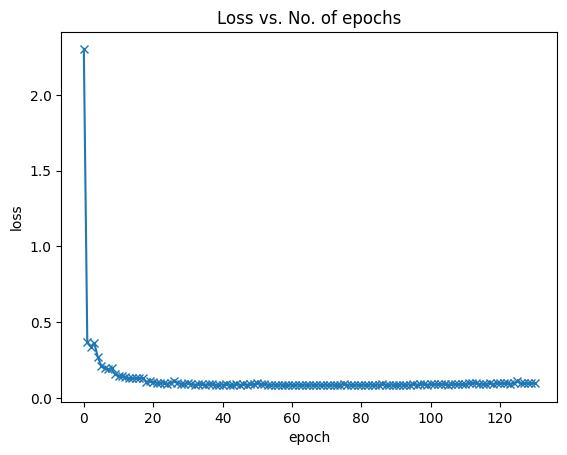

time: 206 ms (started: 2023-09-27 03:54:44 +00:00)


In [540]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

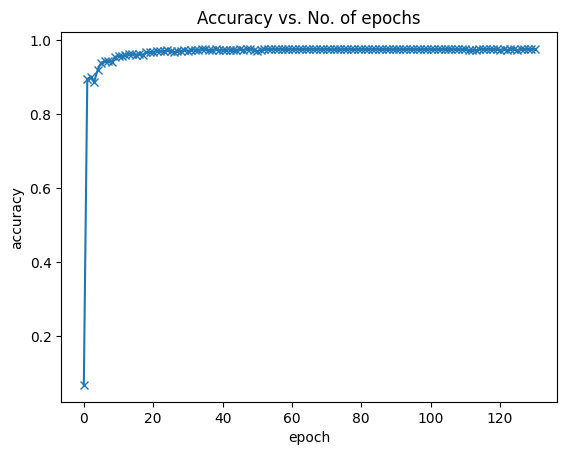

time: 215 ms (started: 2023-09-27 03:54:44 +00:00)


In [541]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [542]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=ToTensor())

time: 5.47 ms (started: 2023-09-27 03:54:44 +00:00)


In [543]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

time: 738 µs (started: 2023-09-27 03:54:44 +00:00)


Label: 7 , Predicted: 7


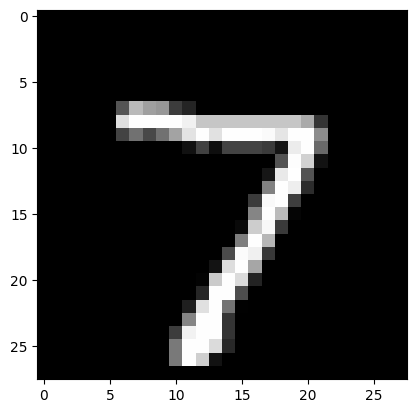

time: 196 ms (started: 2023-09-27 03:54:44 +00:00)


In [544]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


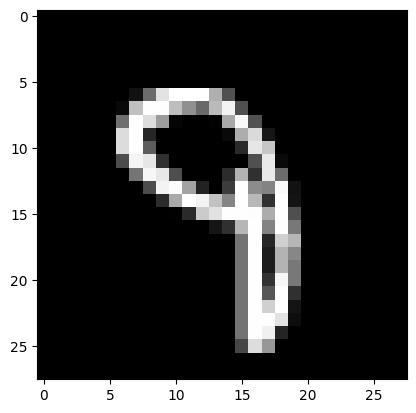

time: 198 ms (started: 2023-09-27 03:54:44 +00:00)


In [545]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


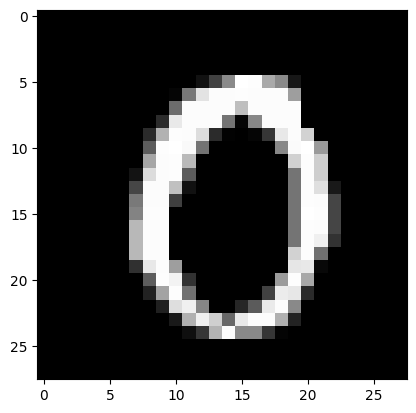

time: 202 ms (started: 2023-09-27 03:54:45 +00:00)


In [546]:
img, label = test_dataset[13]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [547]:
torch.save(model.state_dict(), 'mnist-feedforward.pth')

time: 5.04 ms (started: 2023-09-27 03:54:45 +00:00)
